In [18]:
# import
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import importlib

In [19]:
from utils import get_stock_data
import trade_decision as td
importlib.reload(td)

<module 'trade_decision' from '/Users/zhijiezh/Files/Projects/stock_notifier/trade_decision.py'>

[*********************100%***********************]  1 of 1 completed

Analyzing BTC-USD...
short_window:  5
long_window:  60
rsi_buy_signal:  45
rsi_sell_signal:  70
rsi_window:  60
Buy signals for BTC-USD:
 Price              Close          High           Low          Open  \
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD   
Date                                                                 
2022-11-09  15880.780273  18590.458984  15682.692383  18543.761719   
2022-11-10  17586.771484  18054.312500  15834.018555  15883.158203   
2022-11-14  16618.199219  17109.324219  15872.941406  16352.028320   
2022-11-21  15787.284180  16291.223633  15599.046875  16291.223633   
2022-11-22  16189.769531  16253.047852  15656.606445  15782.300781   
...                  ...           ...           ...           ...   
2025-03-11  82862.210938  83577.757812  76624.250000  78523.875000   
2025-03-17  84075.687500  84725.328125  82492.156250  82576.335938   
2025-03-18  82718.500000  84075.718750  81179.992188  84075.718750   
2025-03-19  86854.2265

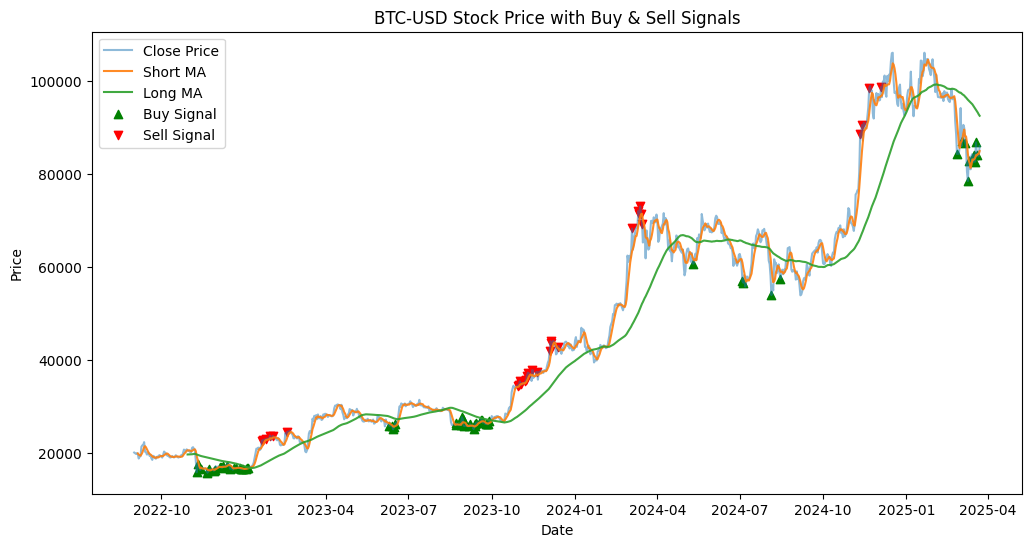

In [25]:

# # Define a list of stock tickers
tickers = ['BTC-USD']
# tickers = ['BABA','PDD','ARM','BTC-USD', 'ETH-USD','NVDA','SMCI','AMC','META','SAVE','LLY', 'BAC','SHOP']
# tickers = ['META', 'GOOG', 'AAPL', 'NVDA', 'BTC-USD','PDD','AMC']
start_date = '2022-09-01'
end_date = '2025-03-24'

# Monitor each stock
# Monitor each stock
for ticker in tickers:
    print(f"Analyzing {ticker}...")
    stock = get_stock_data(ticker, start_date, end_date)
    buy, sell = td.decide_trade(stock, short_window=td.SHORT_WINDOW, long_window=td.LONG_WINDOW, rsi_buy_signal=td.RSI_BUY_SIGNAL, rsi_sell_signal=td.RSI_SELL_SIGNAL, rsi_window=td.RSI_WINDOW )
    print(f"Buy signals for {ticker}:\n", stock[buy])
    print(f"Sell signals for {ticker}:\n", stock[sell])

    # Optional: Plotting
    plt.figure(figsize=(12,6))
    plt.plot(stock['Close'], label='Close Price', alpha=0.5)
    plt.plot(stock['Short_MA'], label='Short MA', alpha=0.9)
    plt.plot(stock['Long_MA'], label='Long MA', alpha=0.9)
    plt.scatter(stock.index[buy], stock['Close'][buy], marker='^', color='g', label='Buy Signal', alpha=1)
    plt.scatter(stock.index[sell], stock['Close'][sell], marker='v', color='r', label='Sell Signal', alpha=1)
    plt.title(f'{ticker} Stock Price with Buy & Sell Signals')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend(loc='best')
    plt.show()


In [ ]:

# # Example usage
# for ticker in tickers:
#   stock = get_stock_data(ticker, start_date, end_date)
#   buy, sell = decide_trade(stock, short_window=5, long_window=20, rsi_buy_signal= 30, rsi_sell_signal=90)
#   trades, total_return, return_percentage = backtest_strategy(stock, buy, sell,30,0.1)
#   print(f"#######################{ticker}##########################")
#   print(f"Trades: {trades}")
#   print(f"Total Return: ${total_return:.2f}")
#   print(f"Return Percentage: {return_percentage:.2f}%")
#   print(f"Hold Return Percentage: {(stock['Close'][len(stock)-1]-stock['Close'][0])/stock['Close'][0]*100:.2f}%")